# Домашнє завдання: Прогнозування кредитного ризику

## Мета завдання
Застосувати знання з лекції для побудови моделі логістичної регресії, що прогнозує ймовірність дефолту за кредитом, іншими словами, що людина не поверне кредит. Ви пройдете весь цикл: від дослідницького аналізу до оцінки якості класифікаційної моделі.

## Опис датасету
**Credit Risk Dataset** містить інформацію про 32,000+ позичальників з такими параметрами:
- **person_age**: Вік позичальника
- **person_income**: Річний дохід
- **person_home_ownership**: Тип володіння житлом
- **person_emp_length**: Стаж роботи (в роках)
- **loan_intent**: Мета кредиту
- **loan_grade**: Кредитний рейтинг (A - кращий, F - гірший)
- **loan_amnt**: Сума кредиту
- **loan_int_rate**: Процентна ставка
- **loan_status**: Статус кредиту (0 = сплачено, 1 = дефолт) - **цільова змінна**
- **loan_percent_income**: Відношення кредиту до доходу
- **cb_person_default_on_file**: Історія дефолтів (Y/N)
- **cb_person_cred_hist_length**: Довжина кредитної історії

---

## Завдання 1: Завантаження та перший огляд даних (1 бал)

**Що потрібно зробити:**
1. Завантажте дані з файлу `credit_risk_dataset.csv`
2. Виведіть розмір датасету
3. Покажіть перші 5 рядків
4. Виведіть загальну інформацію про дані (кількість записів, типи колонок)
5. Перевірте розподіл цільової змінної (відсотк даних для кожного класу)

Дайте висновок, це задача збалансованої чи незбалансованої класифікації.


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("D:/Studing DATA/Model_python/data/credit_risk_dataset.csv")
df.shape

(32581, 12)

In [5]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
print("Розподіл цільової змінної:")
loan_counts = df['loan_status'].value_counts()
loan_percent = df['loan_status'].value_counts(normalize=True) * 100
print(pd.DataFrame({'Count': loan_counts, 'Percent': loan_percent}))


Розподіл цільової змінної:
             Count    Percent
loan_status                  
0            25473  78.183604
1             7108  21.816396



---

## Завдання 2: Дослідницький аналіз даних (EDA) (4 бали)

**Що потрібно зробити:**
1. Обчисліть відсоток пропущених значень в колонках. За наявності пропущених значень - заповніть їх медіаною для числових колонок і найбільш частим значеннмя для категоріальних.
2. Проаналізуйте розподіл числових змінних.
3. Знайдіть та обробіть викиди в колонці person_income з допомогою [Interquartile range](https://uk.wikipedia.org/wiki/%D0%9C%D1%96%D0%B6%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D0%BB%D1%8C%D0%BD%D0%B8%D0%B9_%D1%80%D0%BE%D0%B7%D0%BC%D0%B0%D1%85).
4. Проаналізуйте категоріальні змінні відносно цільової та частоту зустрічання різних значень в них.
5. Візуалізуйте взаємозв'язок ознак з цільовою змінною.


In [9]:
missing_percent = df.isna().mean() * 100
print("Відсоток пропущених значень у колонках:")
print(missing_percent)

Відсоток пропущених значень у колонках:
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


In [12]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)  
    else:
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)  


In [13]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Опис числових колонок:")
print(df[numerical_cols].describe())

Опис числових колонок:
         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       32581.000000  32581.000000   
mean      27.734600   6.607485e+04           4.767994   9589.371106   
std        6.348078   6.198312e+04           4.087372   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   32581.000000  32581.000000         32581.000000   
mean       11.009620      0.218164             0.170203   
std         3.081611      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         8.490000      0.000000        

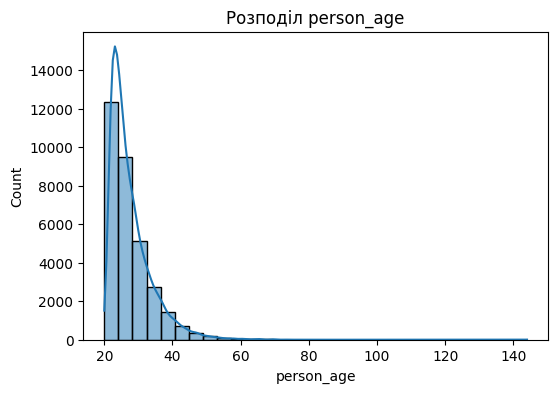

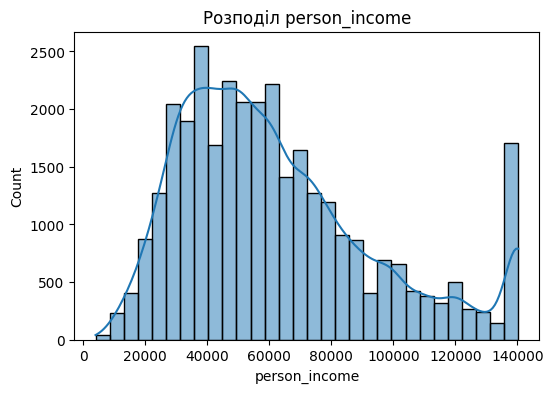

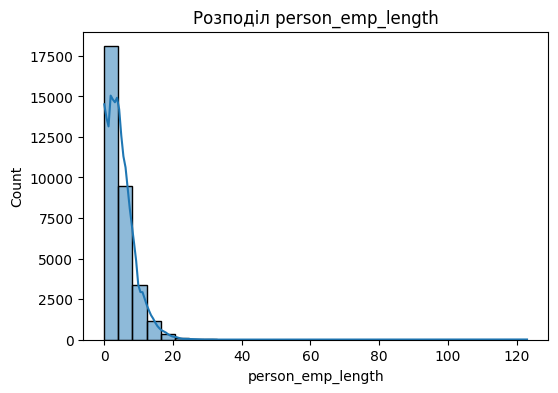

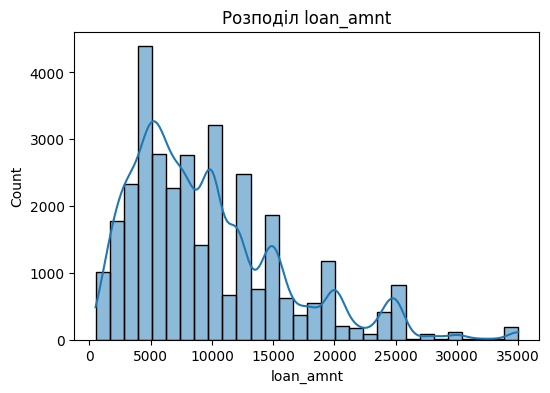

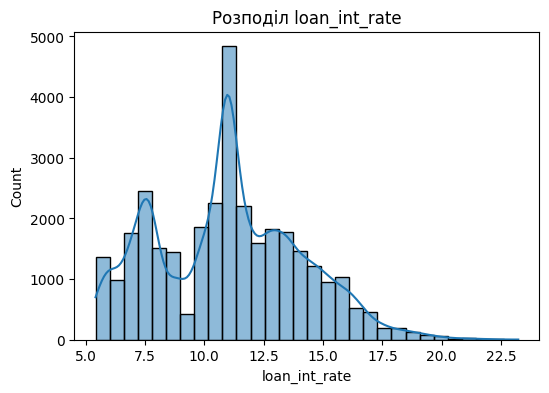

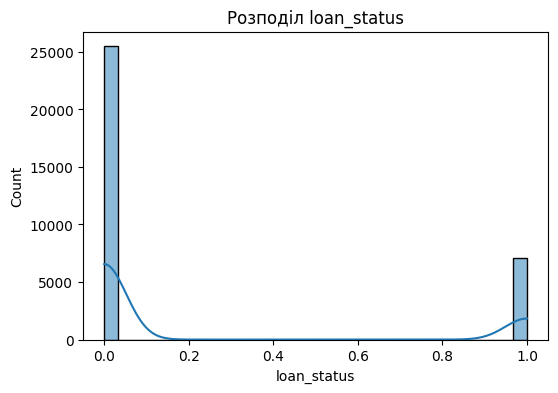

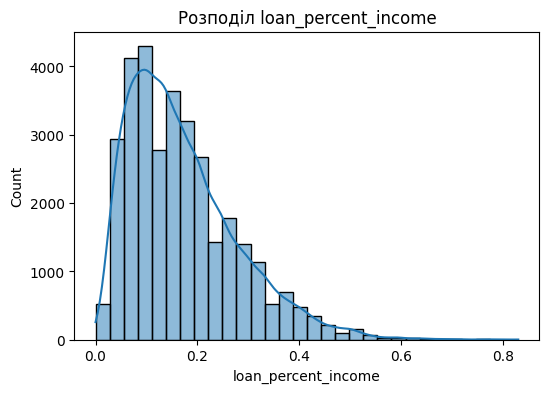

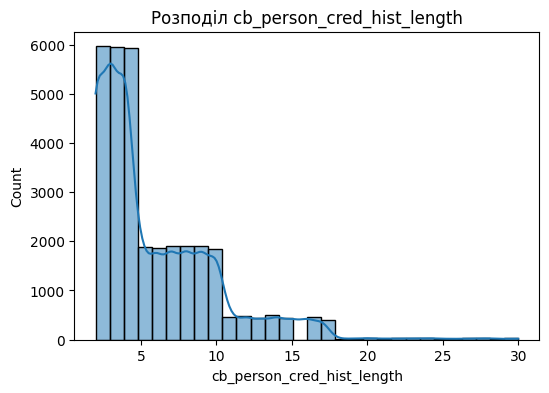

In [24]:
# Візуалізація розподілу числових змінних
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Розподіл {col}')
    plt.show()

In [15]:
Q1 = df['person_income'].quantile(0.25)
Q3 = df['person_income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Відкинути викиди або обмежити значення
df['person_income'] = np.where(df['person_income'] < lower_bound, lower_bound, df['person_income'])
df['person_income'] = np.where(df['person_income'] > upper_bound, upper_bound, df['person_income'])

In [18]:
 # Аналіз категоріальних змінних
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"\nКолонка: {col}")
    print(df[col].value_counts())
    print(df.groupby(col)['loan_status'].value_counts(normalize=True).unstack() * 100)


Колонка: person_home_ownership
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64
loan_status                    0          1
person_home_ownership                      
MORTGAGE               87.429337  12.570663
OTHER                  69.158879  30.841121
OWN                    92.530960   7.469040
RENT                   68.430013  31.569987

Колонка: loan_intent
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64
loan_status                0          1
loan_intent                            
DEBTCONSOLIDATION  71.412126  28.587874
EDUCATION          82.783202  17.216798
HOMEIMPROVEMENT    73.897365  26.102635
MEDICAL            73.299292  26.700708
PERSONAL           80.112298  19.887702
VENTURE            85.189718  14.810282

Колонка: loan_grade
loan_grade
A    10777
B    

                            person_age  person_income  person_emp_length  \
person_age                    1.000000       0.117981           0.161454   
person_income                 0.117981       1.000000           0.198751   
person_emp_length             0.161454       0.198751           1.000000   
loan_amnt                     0.050787       0.420091           0.113851   
loan_int_rate                 0.011853      -0.017050          -0.051262   
loan_status                  -0.021629      -0.245934          -0.082182   
loan_percent_income          -0.042411      -0.367245          -0.054134   
cb_person_cred_hist_length    0.859133       0.093901           0.143069   

                            loan_amnt  loan_int_rate  loan_status  \
person_age                   0.050787       0.011853    -0.021629   
person_income                0.420091      -0.017050    -0.245934   
person_emp_length            0.113851      -0.051262    -0.082182   
loan_amnt                    1.000000  

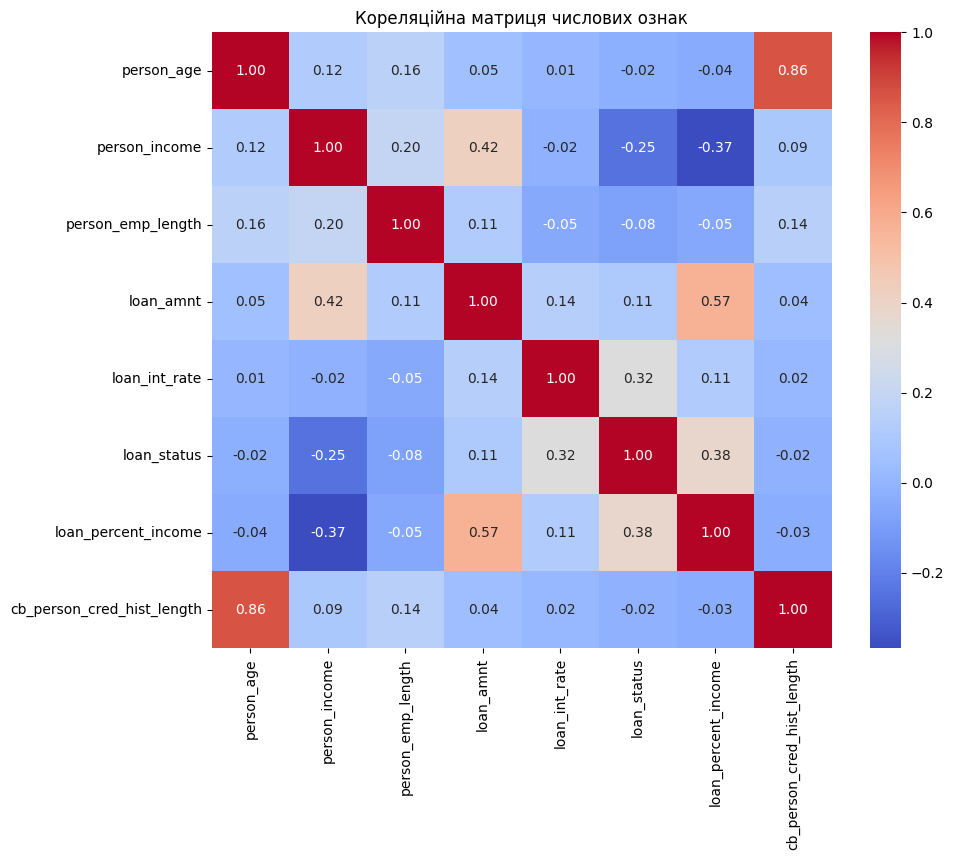

In [25]:
# Вибираємо числові колонки (включаючи цільову, якщо вона числова)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Обчислюємо кореляційну матрицю
corr_matrix = df[numerical_cols].corr()

# Виводимо матрицю
print(corr_matrix)

# Візуалізація за допомогою heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Кореляційна матриця числових ознак")
plt.show()

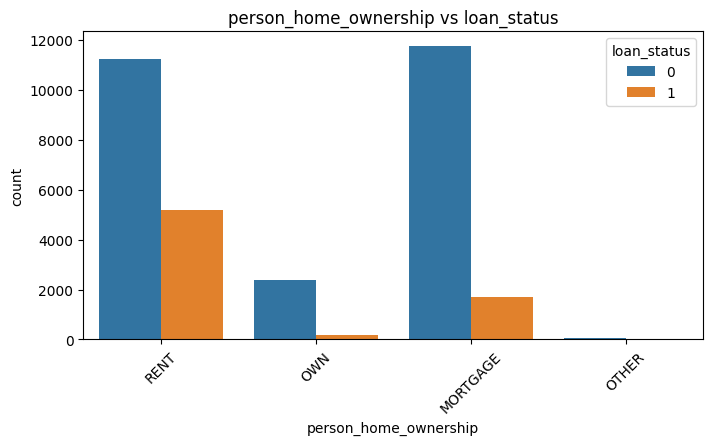

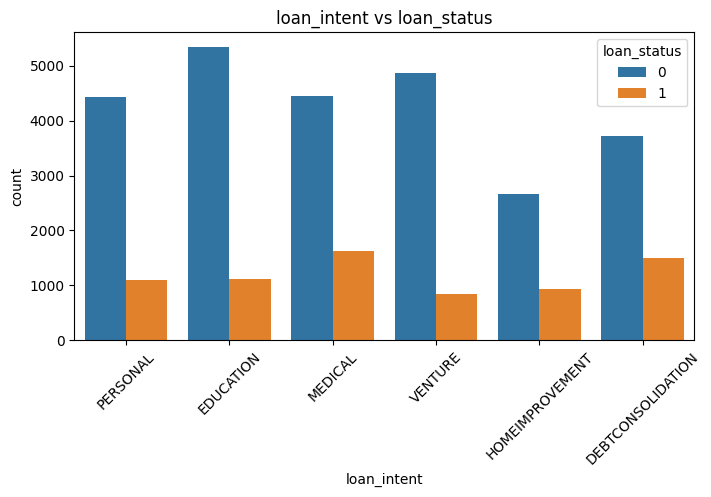

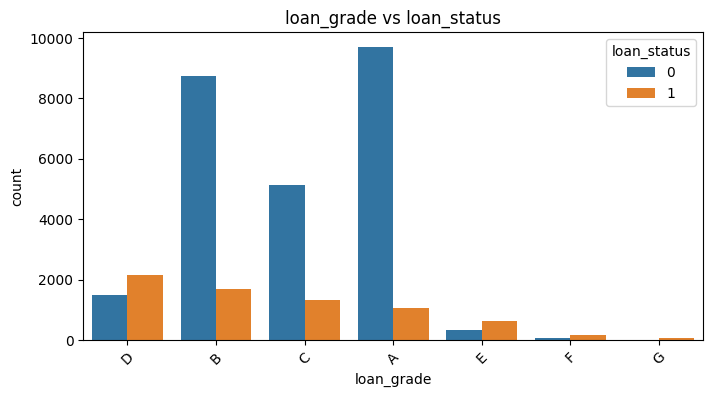

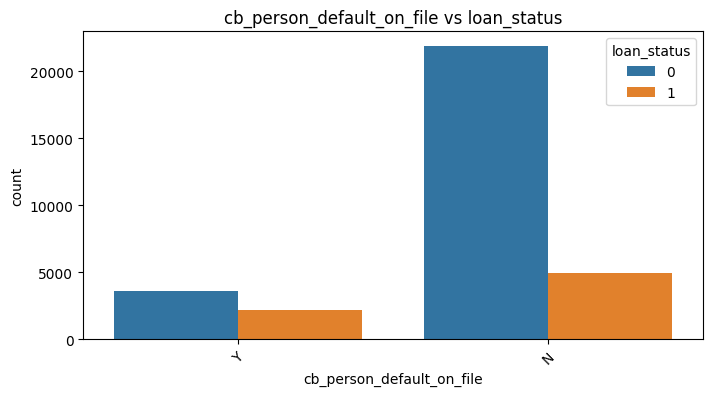

In [27]:
# Для категоріальних ознак
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='loan_status', data=df)
    plt.title(f'{col} vs loan_status')
    plt.xticks(rotation=45)
    plt.show()


---

## Завдання 3: Аналіз кореляцій та Feature Engineering (3 бали)

**Що потрібно зробити:**
1. Побудуйте матрицю кореляцій для числових змінних.
2. Закодуйте категоріальні змінні.
3. Виберіть фінальний набір ознак, можна лишити всі, якщо ви вважаєте, що це - доцільно.



In [29]:
# Вибір категоріальних колонок
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

 # Кодування категоріальних змінних
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


final_features = df_encoded.columns.drop('loan_status')  # якщо loan_status - цільова

print("Фінальний набір ознак:")
print(final_features)

Фінальний набір ознак:
Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_B',
       'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F',
       'loan_grade_G', 'cb_person_default_on_file_Y'],
      dtype='object')



---

## Завдання 4: Підготовка даних та навчання моделі (3 бали)

**Що потрібно зробити:**
1. Розділіть дані на X та y
2. Поділіть на навчальну та тестову вибірки
3. Застосуйте масштабування
4. Навчіть модель логістичної регресії
5. Зробіть прогнози на тренувальній та тестовій вибірках.



In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [31]:
X = df_encoded[final_features]
y = df_encoded['loan_status'] 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Важливо! Зберігаємо пропорції класів
)

print(f"Train: {X_train.shape[0]} клієнтів")
print(f"Test: {X_test.shape[0]} клієнтів")
print(f"Відтік в train: {y_train.mean():.1%}")
print(f"Відтік в test: {y_test.mean():.1%}")

Train: 26064 клієнтів
Test: 6517 клієнтів
Відтік в train: 21.8%
Відтік в test: 21.8%


In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [35]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [38]:
# Прогнозуємо класи
y_pred = model.predict(X_test_scaled)

# Прогнозуємо ймовірності
y_pred_proba = model.predict_proba(X_test_scaled)

In [43]:
# Приклад прогнозів для перших 5 клієнтів
sample_predictions = pd.DataFrame({
    'Реальний кредит': y_test.values[:5],
    'Прогноз': y_pred[:5],
    'Ймовірність відмови кредит': y_pred_proba[:5, 0].round(3),
    'Ймовірність отримати кредит': y_pred_proba[:5, 1].round(3)
})
print(sample_predictions)

   Реальний кредит  Прогноз  Ймовірність відмови кредит  \
0                0        0                       0.887   
1                0        0                       0.911   
2                0        0                       0.992   
3                0        0                       0.927   
4                0        0                       0.994   

   Ймовірність отримати кредит  
0                        0.113  
1                        0.089  
2                        0.008  
3                        0.073  
4                        0.006  


In [36]:
print("Точність на тренувальній вибірці:", accuracy_score(y_train, y_train_pred))
print("Точність на тестовій вибірці:", accuracy_score(y_test, y_test_pred))
print("\nЗвіт класифікації для тестової вибірки:\n", classification_report(y_test, y_test_pred))

Точність на тренувальній вибірці: 0.8666743400859422
Точність на тестовій вибірці: 0.8669633266840571

Звіт класифікації для тестової вибірки:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      5095
           1       0.77      0.56      0.65      1422

    accuracy                           0.87      6517
   macro avg       0.83      0.76      0.78      6517
weighted avg       0.86      0.87      0.86      6517




---

## Завдання 5: Оцінка якості моделі (4 бали)

**Що потрібно зробити:**
1. Побудуйте confusion matrix.
2. Обчисліть основні метрики (accuracy, precision, recall, f1).
3. Побудуйте ROC-криву та обчисліть AUC
4. Проаналізуйте важливість ознак.
5. Зробіть висновки про якість моделі та які ознаки найбільше впливають на прогноз.


In [45]:
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score
)

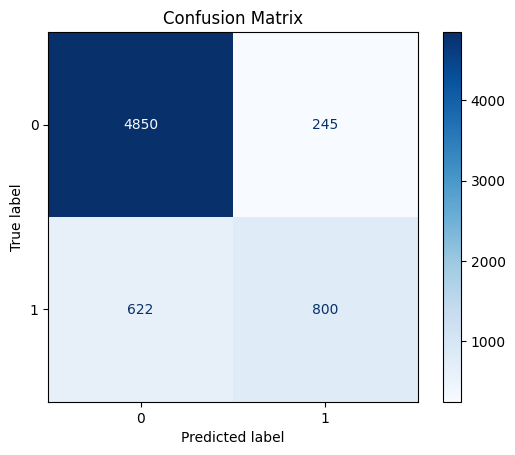

In [46]:
# 1. Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("МЕТРИКИ ЯКОСТІ МОДЕЛІ:")
print(f"Accuracy (Точність):    {accuracy:.3f}")
print(f"Precision (Влучність):  {precision:.3f}")
print(f"Recall (Повнота):       {recall:.3f}")
print(f"F1-score:               {f1:.3f}")

МЕТРИКИ ЯКОСТІ МОДЕЛІ:
Accuracy (Точність):    0.867
Precision (Влучність):  0.766
Recall (Повнота):       0.563
F1-score:               0.649


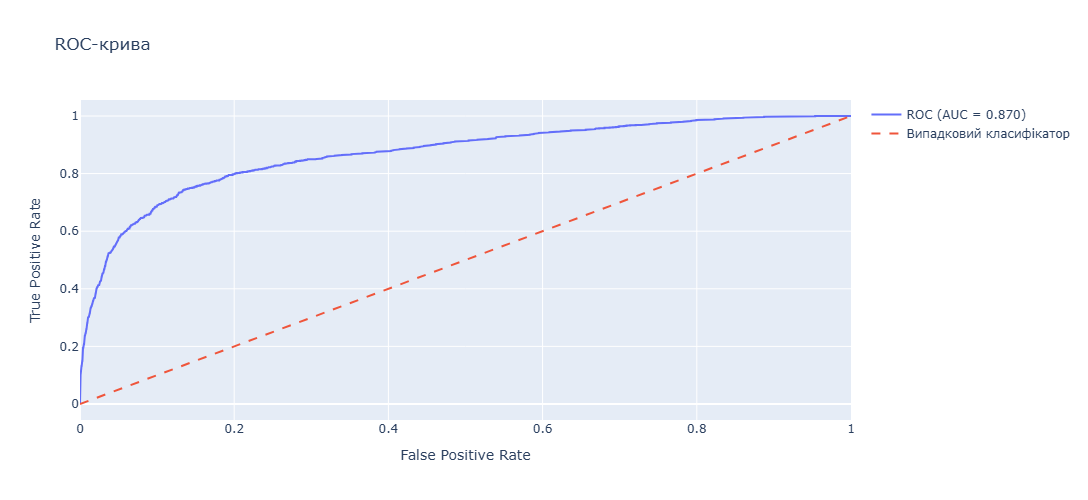

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

# Обчислюємо ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
auc = roc_auc_score(y_test, y_pred_proba[:, 1])

# Візуалізація
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC (AUC = {auc:.3f})'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(dash='dash'),
                        name='Випадковий класифікатор'))
fig.update_layout(
    title='ROC-крива',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    height=500
)
fig.show()

In [52]:
# Отримуємо коефіцієнти моделі
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0],
    'abs_coefficient': np.abs(model.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

feature_importance

,feature,coefficient,abs_coefficient
5,loan_percent_income,1.254270,1.254270
17,loan_grade_D,0.822317,0.822317
18,loan_grade_E,0.481755,0.481755
3,loan_amnt,-0.467390,0.467390
8,person_home_ownership_OWN,-0.445162,0.445162
9,person_home_ownership_RENT,0.420598,0.420598
14,loan_intent_VENTURE,-0.411387,0.411387
10,loan_intent_EDUCATION,-0.319694,0.319694
19,loan_grade_F,0.282783,0.282783
20,loan_grade_G,0.273675,0.273675


#### Висновки

Модель досить точна, але слабка в повноті виявлення ризикових кредитів. Для фінансового застосування можливо варто оптимізувати поріг або використовувати додаткові методи (наприклад, Random Forest, XGBoost).

Найважливіші фактори ризику:

Висока частка доходу, що йде на кредит (loan_percent_income)

Клас кредиту (loan_grade)

Статус власності житла (OWN/RENT)

Менш впливові ознаки (person_age, cb_person_cred_hist_length) можна розглядати для скорочення набору ознак.


---

## Завдання 6: Оптимізація порогу та бізнес-аналіз (2 бали)

**Що потрібно зробити:**
1. Проаналізуйте метрики precision, recall, F1 при різних порогах класифікації (мінімум - 5 різних порогів). Візуалізуйте як змінюються метрики якості при зміні порогу.
2. Оберіть оптимальний поріг для бізнес-задачі - можна обрати виходячи з попереднього пункту, або додати своїх роздумів і обрати інший.



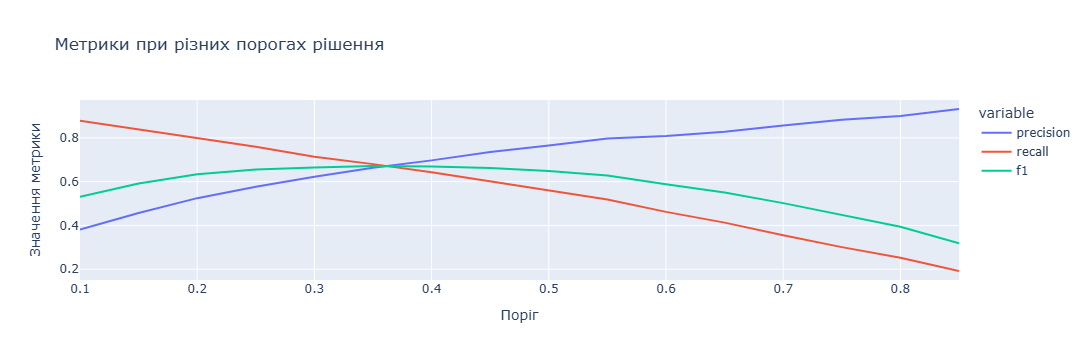

In [54]:
 # Аналіз різних порогів
thresholds = np.arange(0.1, 0.9, 0.05)
metrics_by_threshold = []

for threshold in thresholds:
    y_pred_custom = (y_pred_proba[:, 1] >= threshold).astype(int)

    metrics_by_threshold.append({
        'threshold': threshold,
        'precision': precision_score(y_test, y_pred_custom),
        'recall': recall_score(y_test, y_pred_custom),
        'f1': f1_score(y_test, y_pred_custom)
    })

metrics_df = pd.DataFrame(metrics_by_threshold)

# Візуалізація
fig = px.line(
    metrics_df.melt(id_vars='threshold'),
    x='threshold',
    y='value',
    color='variable',
    title='Метрики при різних порогах рішення',
    labels={'value': 'Значення метрики', 'threshold': 'Поріг'},
)
fig.show()

Тобт оптимальний поріг який оптимізує точність - 0.362.


---

## Завдання 7 (Опціональне): Покращення моделі та висновки (2 бали)

**Що потрібно зробити:**

На цих же даних навчіть DecisionTreeClassifier та RandomForestClassifier. Яка з трьох моделей дає найкращий результат на тестовому наборі?

Поріг класифікації можна для порівняння якостей моделей використовувати стандартний 0.5, або той, що ви виявили, як оптимальний на попередньому кроці.


In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


threshold = 0.362  # новий поріг

# -----------------------------
# 1. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_dt_prob = dt_model.predict_proba(X_test)[:,1]
y_dt_pred = (y_dt_prob >= threshold).astype(int)

# 2. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_prob = rf_model.predict_proba(X_test)[:,1]
y_rf_pred = (y_rf_prob >= threshold).astype(int)

# 3. Logistic Regression (якщо ще не навчена)
y_lr_prob = model.predict_proba(X_test_scaled)[:,1]  # модель логістичної регресії
y_lr_pred = (y_lr_prob >= threshold).astype(int)

# -----------------------------
# Функція для оцінки метрик
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nМетрики для {model_name} (threshold={threshold}):")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.3f}")
    print(f"Precision: {precision_score(y_true, y_pred):.3f}")
    print(f"Recall: {recall_score(y_true, y_pred):.3f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.3f}")

# -----------------------------
# Оцінка всіх моделей
evaluate_model(y_test, y_lr_pred, "Logistic Regression")
evaluate_model(y_test, y_dt_pred, "Decision Tree")
evaluate_model(y_test, y_rf_pred, "Random Forest")




Метрики для Logistic Regression (threshold=0.362):
Accuracy: 0.855
Precision: 0.668
Recall: 0.667
F1-score: 0.668

Метрики для Decision Tree (threshold=0.362):
Accuracy: 0.887
Precision: 0.730
Recall: 0.762
F1-score: 0.746

Метрики для Random Forest (threshold=0.362):
Accuracy: 0.921
Precision: 0.865
Recall: 0.755
F1-score: 0.806


#### Висновок:

Accuracy: найвища у Random Forest (0.921) — модель найточніше класифікує всі випадки.

Precision: найвища у Random Forest (0.865) — серед передбачених дефолтів більшість справжні.

Recall: трохи вище у Decision Tree (0.762), але Random Forest теж близький (0.755).

F1-score: найвищий у Random Forest (0.806) — найкращий баланс між Precision і Recall.

### Найкраща модель: Random Forest

Вона зберігає високий Precision і хороший Recall при порозі 0.362, забезпечуючи збалансовану якість прогнозу.

Decision Tree добре показує Recall, але Precision нижче.

Logistic Regression відстає за всіма метриками.

Якщо хочеш, можу побудувати графік для наочності порівняння F1, Precision, Recall для трьох моделей при цьому порозі.

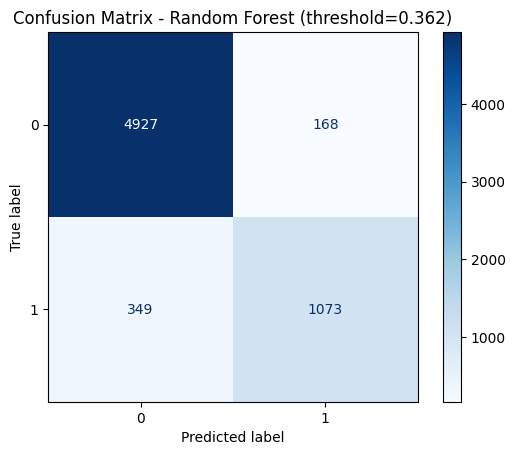

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix для Random Forest
cm_rf = confusion_matrix(y_test, y_rf_pred)  # y_rf_pred — прогноз з порогом 0.362
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest (threshold=0.362)")
plt.show()


# Знизився показник FP з 622 до 349, а FN з 245 до 168 